Dataset:
Digits: 10 class handwritten digits
http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits

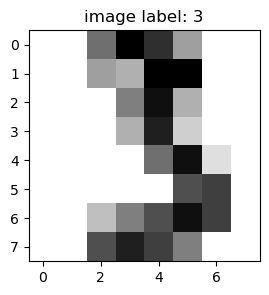

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

digits = load_digits()
digits.images.shape
digits.data.shape
digits.target.shape
sample_index = 45
plt.figure(figsize=(3, 3))
plt.imshow(digits.images[sample_index], cmap=plt.cm.gray_r,
           interpolation='nearest')
plt.title("image label: %d" % digits.target[sample_index]);

Train / Test Split

Let's keep some held-out data to be able to measure the generalization performance of our model.

In [13]:
from sklearn.model_selection import train_test_split


data = np.asarray(digits.data, dtype='float32')
target = np.asarray(digits.target, dtype='int32')

X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.15, random_state=37)
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(270,)

Preprocessing of the Input Data:

Make sure that all input variables are approximately on the same scale via input normalization:

In [15]:
from sklearn import preprocessing


# mean = 0 ; standard deviation = 1.0
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# print(scaler.mean_)
# print(scaler.scale_)
X_train.shape
X_train.mean(axis=0)
X_train.std(axis=0)

array([0.        , 0.99999774, 0.9999994 , 1.0000005 , 0.9999989 ,
       0.9999988 , 1.0000077 , 0.9999965 , 1.0000098 , 0.9999947 ,
       1.0000007 , 0.9999992 , 0.9999999 , 0.99999684, 0.9999984 ,
       0.99999887, 0.9999969 , 1.000001  , 1.0000002 , 1.0000025 ,
       0.99999905, 1.000004  , 1.0000008 , 0.9999972 , 0.9999967 ,
       0.99999726, 1.        , 1.0000007 , 1.0000029 , 0.9999996 ,
       0.99999696, 1.0000001 , 0.        , 1.0000007 , 1.0000023 ,
       0.9999993 , 0.9999994 , 0.9999997 , 0.9999955 , 0.        ,
       0.9999891 , 0.99999785, 1.0000032 , 0.9999999 , 0.99999756,
       1.000001  , 0.999996  , 0.9999987 , 1.0000006 , 0.9999936 ,
       1.0000038 , 1.0000004 , 1.0000012 , 0.999997  , 0.99999785,
       0.9999988 , 0.9999857 , 1.0000073 , 0.9999967 , 1.0000031 ,
       0.9999993 , 1.        , 0.999996  , 0.9999977 ], dtype=float32)

Let's display the one of the transformed sample (after feature standardization):

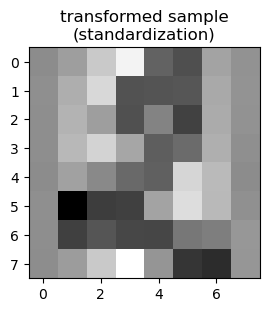

In [17]:
sample_index = 45
plt.figure(figsize=(3, 3))
plt.imshow(X_train[sample_index].reshape(8, 8),
           cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("transformed sample\n(standardization)");

The scaler objects makes it possible to recover the original sample:

(1527, 64) (1527,)
(270, 64) (270,)


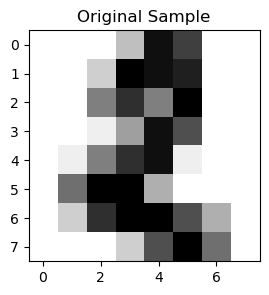

In [19]:
plt.figure(figsize=(3, 3))
sample_data = X_train[sample_index].reshape(1, -1)
transformed_sample = scaler.inverse_transform(sample_data)
plt.imshow(transformed_sample.reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("Original Sample");
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

Preprocessing of the Target Data

To train a first neural network we also need to turn the target variable into a vector "one-hot-encoding" representation. Here are the labels of the first samples in the training set encoded as integers:

In [21]:
y_train[:3]


array([2, 9, 5], dtype=int32)

Keras provides a utility function to convert integer-encoded categorical variables as one-hot encoded values:

In [23]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train)
Y_train[:3]
Y_train.shape

(1527, 10)

Feed Forward Neural Networks with Keras

Objectives of this section:

Build and train a first feedforward network using Keras
https://www.tensorflow.org/guide/keras/overview

Experiment with different optimizers, activations, size of layers, initializations

A First Keras Model

We can now build an train a our first feed forward neural network using the high level API from keras:

first we define the model by stacking layers with the right dimensions,
then we define a loss function and plug the SGD optimizer,
then we feed the model the training data for fixed number of epochs

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

input_dim = X_train.shape[1]
hidden_dim = 100
output_dim = Y_train.shape[1]

model = Sequential()
model.add(Dense(hidden_dim, input_dim=input_dim, activation="tanh"))
model.add(Dense(output_dim, activation="softmax"))

model.compile(optimizer=optimizers.SGD(learning_rate=0.1),
              loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=15, batch_size=32)

Epoch 1/15
 1/39 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - accuracy: 0.1875 - loss: 2.4014

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5917 - loss: 1.3635 - val_accuracy: 0.9118 - val_loss: 0.3985
Epoch 2/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - accuracy: 0.9344 - loss: 0.3427 - val_accuracy: 0.9412 - val_loss: 0.2659
Epoch 3/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - accuracy: 0.9480 - loss: 0.2405 - val_accuracy: 0.9444 - val_loss: 0.2081
Epoch 4/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - accuracy: 0.9736 - loss: 0.1664 - val_accuracy: 0.9706 - val_loss: 0.1755
Epoch 5/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - accuracy: 0.9701 - loss: 0.1544 - val_accuracy: 0.9706 - val_loss: 0.1568
Epoch 6/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - accuracy: 0.9687 - loss: 0.1367 - val_accuracy: 0.9673 - val_loss: 0.1424
Epoch 7/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - accuracy: 0.9822 - loss: 0.1133 - val_accuracy: 0.9739 - val_loss: 0.1309
Epoch 8/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - accuracy: 0.9852 - loss: 0.0973 - val_accuracy: 0.9771 - val_lo

Visualizing the Convergence

Let's wrap the keras history info into a pandas dataframe for easier plotting:

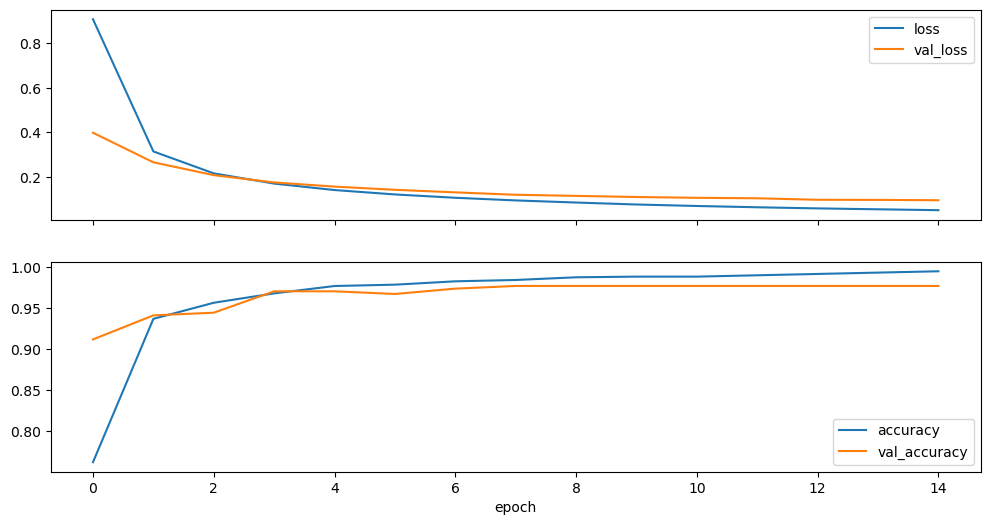

In [27]:
import pandas as pd

history_df = pd.DataFrame(history.history)
history_df["epoch"] = history.epoch
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(12, 6))
history_df.plot(x="epoch", y=["loss", "val_loss"], ax=ax0)
history_df.plot(x="epoch", y=["accuracy", "val_accuracy"], ax=ax1);

Monitoring Convergence with Tensorboard

Tensorboard is a built-in neural network monitoring tool.

In [29]:
%load_ext tensorboard
!rm -rf tensorboard_logs
import datetime
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Dense(hidden_dim, input_dim=input_dim, activation="tanh"))
model.add(Dense(output_dim, activation="softmax"))

model.compile(optimizer=optimizers.SGD(learning_rate=0.1),
              loss='categorical_crossentropy', metrics=['accuracy'])

timestamp =  datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "tensorboard_logs/" + timestamp
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(x=X_train, y=Y_train, validation_split=0.2, epochs=15,
          callbacks=[tensorboard_callback]);
%tensorboard --logdir tensorboard_logs


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Epoch 1/15
 1/39 ━━━━━━━━━━━━━━━━━━━━ 6s 161ms/step - accuracy: 0.0625 - loss: 2.6136

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5757 - loss: 1.3965 - val_accuracy: 0.9020 - val_loss: 0.4197
Epoch 2/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9233 - loss: 0.3480 - val_accuracy: 0.9379 - val_loss: 0.2874
Epoch 3/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9569 - loss: 0.2330 - val_accuracy: 0.9608 - val_loss: 0.2274
Epoch 4/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9651 - loss: 0.1729 - val_accuracy: 0.9641 - val_loss: 0.1974
Epoch 5/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9717 - loss: 0.1514 - val_accuracy: 0.9673 - val_loss: 0.1794
Epoch 6/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9799 - loss: 0.1157 - val_accuracy: 0.9673 - val_loss: 0.1640
Epoch 7/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9823 - loss: 0.1046 - val_accuracy: 0.9641 - val_loss: 0.1556
Epoch 8/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9783 - loss: 0.0979 - val_accuracy: 0.9673 - val_loss: 0.1460
Epo

Reusing TensorBoard on port 6007 (pid 75979), started 1 day, 3:19:19 ago. (Use '!kill 75979' to kill it.)